<a href="https://colab.research.google.com/github/Ifty-1/Cse-475/blob/main/Lab_3_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zeesolver/uhygtttt")

print("Path to dataset files:", path)


100%|██████████| 1.85k/1.85k [00:00<00:00, 3.70MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/zeesolver/uhygtttt/versions/1


In [ ]:
# Install necessary library
!pip install kagglehub --quiet

# Import kagglehub
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("zeesolver/uhygtttt")

# Locate the CSV file
import os

# Get the first CSV file in the downloaded dataset folder
csv_files = [file for file in os.listdir(path) if file.endswith('.csv')]

if csv_files:
    dataset_path = os.path.join(path, csv_files[0])
    print("Dataset found:", dataset_path)
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset.")


Dataset found: /root/.cache/kagglehub/datasets/zeesolver/uhygtttt/versions/1/output.csv


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing values for numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])

# Impute missing values for categorical columns (if any) with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

# Encode categorical variables if present
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Normalize the dataset
scaler = StandardScaler()
features = data.iloc[:, :-1]
target = data.iloc[:, -1]
X = scaler.fit_transform(features)
y = target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData preprocessing complete.")


Dataset Preview:


Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No


Missing Values:
Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

Data preprocessing complete.


In [ ]:
# Step 1: Separate features and target
X = data.drop(columns=['Anaemic'])
y = data['Anaemic']

# Step 2: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Implement Bagging (RandomForest)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Implement Boosting (GradientBoosting)
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Step 5: Implement Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base models for stacking
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define meta-model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Step 6: Implement Voting (Majority Voting)
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='hard')
voting_model.fit(X_train, y_train)

# Step 7: Evaluate the models
from sklearn.metrics import accuracy_score

# Bagging (RandomForest) Evaluation
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')

# Boosting (GradientBoosting) Evaluation
gb_pred = gb_model.predict(X_test)
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.4f}')

# Stacking Evaluation
stacking_pred = stacking_model.predict(X_test)
print(f'Stacking Accuracy: {accuracy_score(y_test, stacking_pred):.4f}')

# Voting Evaluation
voting_pred = voting_model.predict(X_test)
print(f'Voting Accuracy: {accuracy_score(y_test, voting_pred):.4f}')


Random Forest Accuracy: 1.0000
Gradient Boosting Accuracy: 1.0000
Stacking Accuracy: 1.0000
Voting Accuracy: 1.0000


In [ ]:
pip install shap


In [ ]:
# Check the shape of the feature matrix X
print(f"Feature matrix X shape: {X.shape}")

# Check the shape of the SHAP values
print(f"SHAP values shape: {shap_values_rf[1].shape}")


Feature matrix X shape: (104, 6)
SHAP values shape: (6, 2)


In [ ]:

# Recalculate the SHAP values correctly using the model and dataset
shap_values_rf = explainer_rf.shap_values(X)


In [ ]:
# Check the shape of SHAP values for both classes
print(f"SHAP values for class 0 shape: {shap_values_rf[0].shape}")
print(f"SHAP values for class 1 shape: {shap_values_rf[1].shape}")


SHAP values for class 0 shape: (6, 2)
SHAP values for class 1 shape: (6, 2)


In [ ]:
import shap

# Re-initialize the SHAP explainer for the classifier model
explainer_rf = shap.TreeExplainer(rf_model)

# Calculate SHAP values for both classes
shap_values_rf = explainer_rf.shap_values(X)

# Check the shape of SHAP values again
print(f"SHAP values for class 0 shape: {shap_values_rf[0].shape}")
print(f"SHAP values for class 1 shape: {shap_values_rf[1].shape}")


SHAP values for class 0 shape: (6, 2)
SHAP values for class 1 shape: (6, 2)


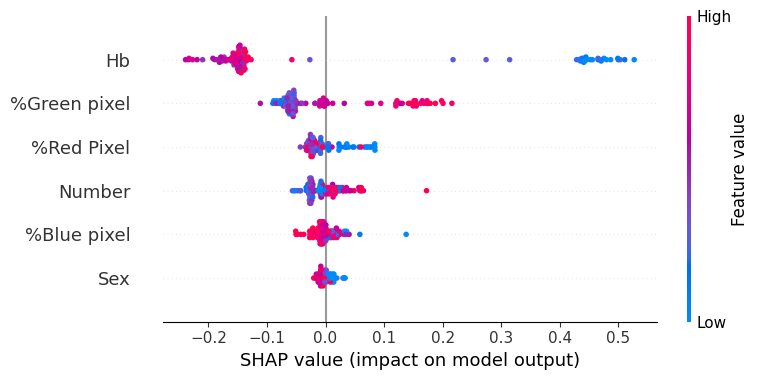

In [ ]:
import shap
import numpy as np

# ... (Your code to calculate shap_values_rf) ...

# Get the correct number of samples and features from the original data
num_samples = X.shape[0]
num_features = X.shape[1]
# Get the correct number of classes - it should be 2 for binary classification
num_classes = shap_values_rf.shape[2]  # Get the number of classes from shap_values_rf shape

# Create a new array with the correct shape
reshaped_shap_values = np.zeros((num_samples, num_features, num_classes))

# Fill the new array with the SHAP values
# Iterate through classes, then samples, then features
for class_index in range(num_classes):
    for sample_index in range(num_samples):
        for feature_index in range(num_features):
            # Access shap_values_rf with correct indices
            reshaped_shap_values[sample_index, feature_index, class_index] = shap_values_rf[sample_index, feature_index, class_index]

# Now you can plot the SHAP summary plot for a specific class
shap.summary_plot(reshaped_shap_values[:, :, 1], X)  # For class 1

In [ ]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1b10b083ee0b3777f841dedc201f5cf0df8a37f8c912ecc0016a2d32061b6004
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


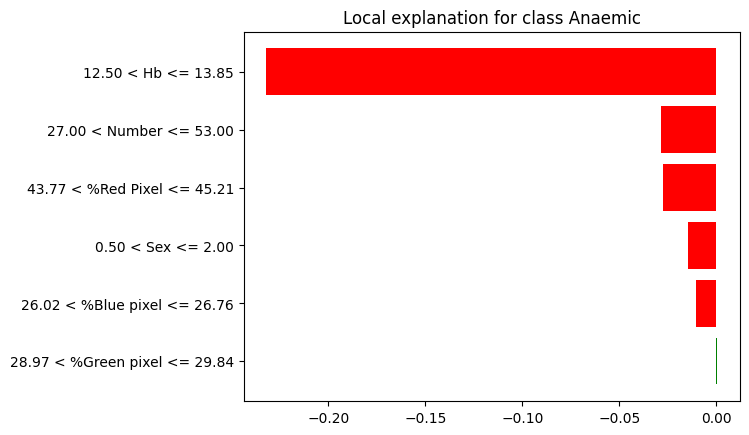

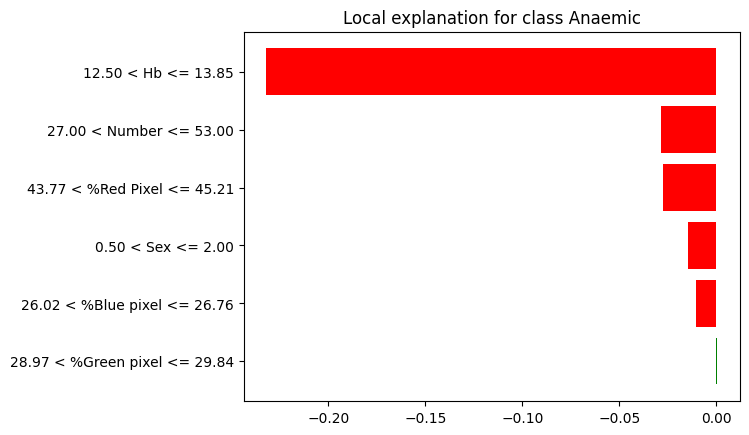

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer_lime_rf = LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=y_train.values,
    mode='classification',
    feature_names=X.columns,
    class_names=['Non-Anaemic', 'Anaemic'],
    discretize_continuous=True
)

# Explain a single prediction
i = 0  # Index of the instance to explain
exp_rf = explainer_lime_rf.explain_instance(X_test.iloc[i].values, rf_model.predict_proba)

# Plot LIME explanation
exp_rf.as_pyplot_figure()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


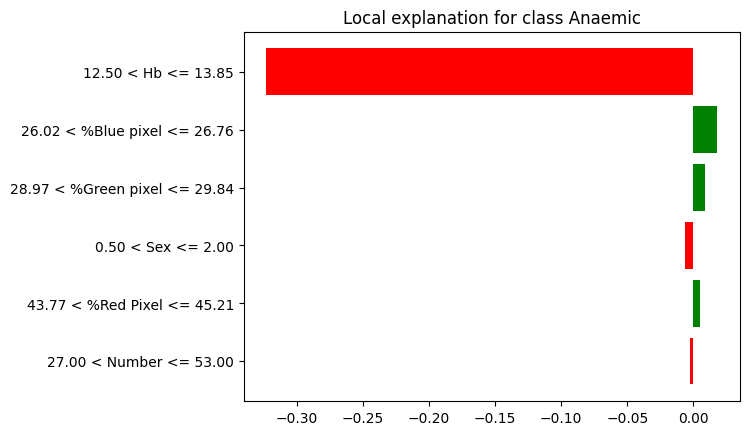

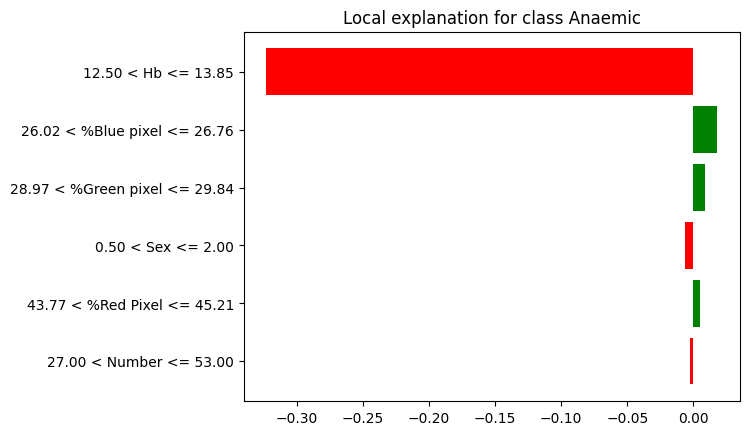

In [ ]:
# Initialize the LIME explainer for GradientBoosting
explainer_lime_gb = LimeTabularExplainer(
    training_data=X_train.values,
    training_labels=y_train.values,
    mode='classification',
    feature_names=X.columns,
    class_names=['Non-Anaemic', 'Anaemic'],
    discretize_continuous=True
)

# Explain a single prediction
exp_gb = explainer_lime_gb.explain_instance(X_test.iloc[i].values, gb_model.predict_proba)

# Plot LIME explanation
exp_gb.as_pyplot_figure()


In [ ]:
# Bagging
from sklearn.ensemble import BaggingClassifier
# Replace 'base_estimator' with 'estimator'
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Boosting
from sklearn.ensemble import GradientBoostingClassifier
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

# Stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stacking_model = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier())],
    final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)

# Voting
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('gb', GradientBoostingClassifier()), ('lr', LogisticRegression())],
    voting='soft'
)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('lr', LogisticRegression())],
                 voting='soft')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return {"Accuracy": acc, "Precision": precision, "Recall": recall, "F1-Score": f1}

# Evaluate each ensemble model
models = {"Bagging": bagging_model, "Boosting": boosting_model,
          "Stacking": stacking_model, "Voting": voting_model}

results = {}
for name, model in models.items():
    metrics = evaluate_model(model, X_test, y_test)
    results[name] = metrics

# Display the results
import pandas as pd
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)


Model Evaluation Results:
          Accuracy  Precision  Recall  F1-Score
Bagging        1.0        1.0     1.0       1.0
Boosting       1.0        1.0     1.0       1.0
Stacking       1.0        1.0     1.0       1.0
Voting         1.0        1.0     1.0       1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



SHAP Summary Plot for Bagging Model:


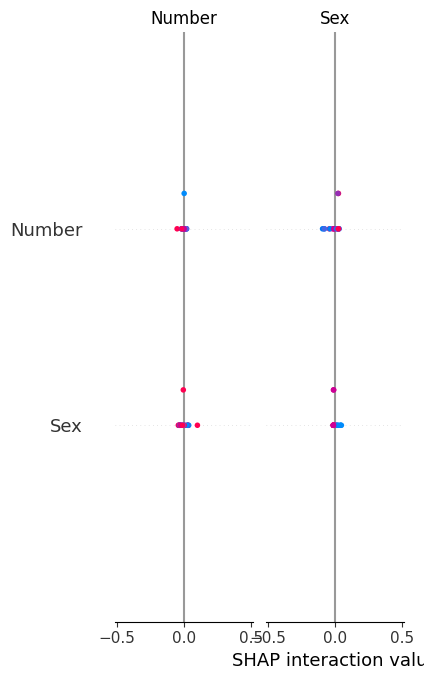


SHAP Summary Plot for Boosting Model:


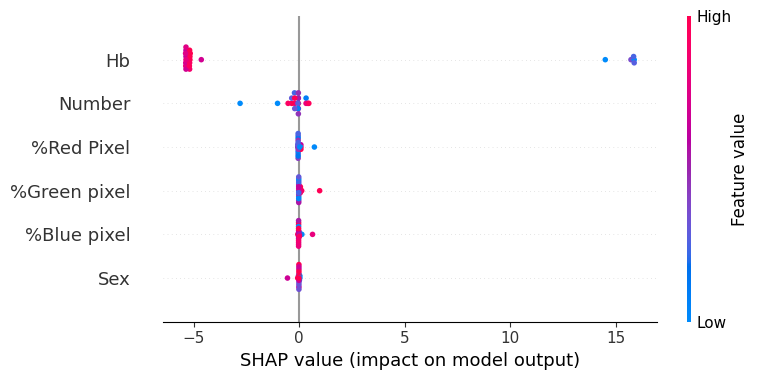

  0%|          | 0/21 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWa


SHAP Summary Plot for Stacking Model:


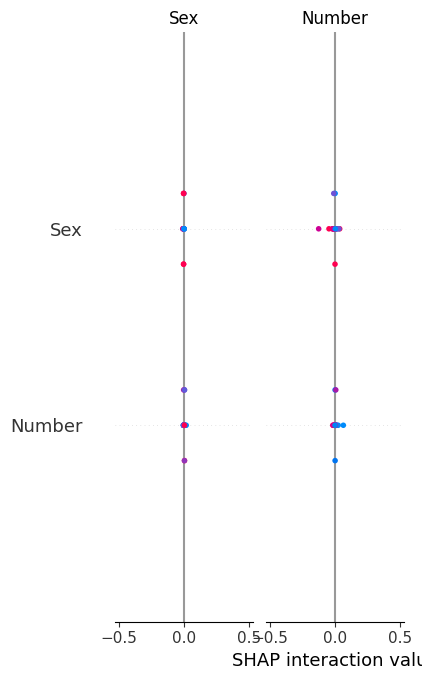

  0%|          | 0/21 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarnin


SHAP Summary Plot for Voting Model:


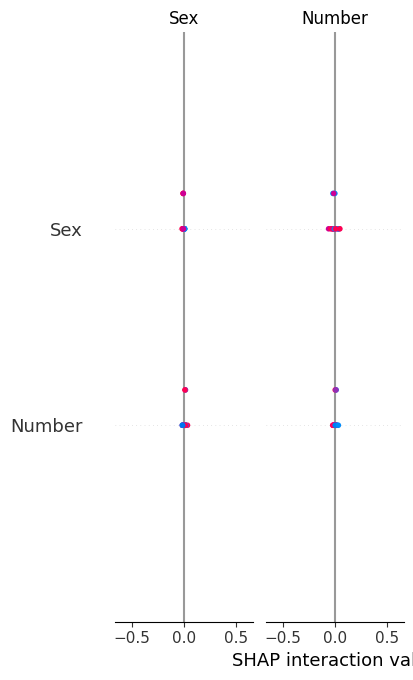

In [ ]:
import shap

# Initialize SHAP explainers for each model
explainers = {
    "Bagging": shap.TreeExplainer(bagging_model.estimators_[0]),  # Explain the first tree in the BaggingClassifier
    "Boosting": shap.TreeExplainer(boosting_model),
    "Stacking": shap.KernelExplainer(stacking_model.predict_proba, X_train),
    "Voting": shap.KernelExplainer(voting_model.predict_proba, X_train)
}

# Calculate SHAP values and plot summary plots
for name, explainer in explainers.items():
    shap_values = explainer.shap_values(X_test)
    print(f"\nSHAP Summary Plot for {name} Model:")
    # Select the appropriate class index based on your model's output
    class_index = 1  # For binary classification, assuming 1 represents the positive class
    try:
        shap.summary_plot(shap_values[class_index], X_test)
    except:
        shap.summary_plot(shap_values, X_test)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME explainer
lime_explainer = LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns.tolist(),
    class_names=["Non-Anaemic", "Anaemic"],
    mode="classification"
)

# Explain predictions for each model
for name, model in models.items():
    print(f"\nLIME Explanations for {name} Model:")
    exp = lime_explainer.explain_instance(X_test.iloc[0].values, model.predict_proba)
    exp.show_in_notebook()



LIME Explanations for Bagging Model:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(



LIME Explanations for Boosting Model:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



LIME Explanations for Stacking Model:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(



LIME Explanations for Voting Model:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from models
bagging_pred = bagging_model.predict(X_test)
boosting_pred = boosting_model.predict(X_test)
stacking_pred = stacking_model.predict(X_test)
voting_pred = voting_model.predict(X_test)

# Create a dictionary to store metrics for all models
results = {
    "Model": ["Bagging", "Boosting", "Stacking", "Voting"],
    "Accuracy": [
        accuracy_score(y_test, bagging_pred),
        accuracy_score(y_test, boosting_pred),
        accuracy_score(y_test, stacking_pred),
        accuracy_score(y_test, voting_pred)
    ],
    "Precision": [
        precision_score(y_test, bagging_pred),
        precision_score(y_test, boosting_pred),
        precision_score(y_test, stacking_pred),
        precision_score(y_test, voting_pred)
    ],
    "Recall": [
        recall_score(y_test, bagging_pred),
        recall_score(y_test, boosting_pred),
        recall_score(y_test, stacking_pred),
        recall_score(y_test, voting_pred)
    ],
    "F1-Score": [
        f1_score(y_test, bagging_pred),
        f1_score(y_test, boosting_pred),
        f1_score(y_test, stacking_pred),
        f1_score(y_test, voting_pred)
    ]
}

# Convert to a DataFrame
results_df = pd.DataFrame(results)

# Display the table
print("Performance Metrics Table:")
print(results_df)

# Optional: Pretty display using tabulate (requires installation of tabulate)
try:
    from tabulate import tabulate
    print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))
except ImportError:
    pass


Performance Metrics Table:
      Model  Accuracy  Precision  Recall  F1-Score
0   Bagging       1.0        1.0     1.0       1.0
1  Boosting       1.0        1.0     1.0       1.0
2  Stacking       1.0        1.0     1.0       1.0
3    Voting       1.0        1.0     1.0       1.0
+----------+----------+-----------+--------+----------+
|  Model   | Accuracy | Precision | Recall | F1-Score |
+----------+----------+-----------+--------+----------+
| Bagging  |   1.0    |    1.0    |  1.0   |   1.0    |
| Boosting |   1.0    |    1.0    |  1.0   |   1.0    |
| Stacking |   1.0    |    1.0    |  1.0   |   1.0    |
|  Voting  |   1.0    |    1.0    |  1.0   |   1.0    |
+----------+----------+-----------+--------+----------+
